In [1]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

# Set directories
base_dir = "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23"
class_dirs = {
    "Mild-Demented": os.path.join(base_dir, "Mild_Demented"),
    "Moderate-Demented": os.path.join(base_dir, "Moderate_Demented"),
    "Non-Demented": os.path.join(base_dir, "Non_Demented"),
    "VeryMild-Demented": os.path.join(base_dir, "Very_Mild_Demented")
}

# Define preprocessing parameters
target_size = (128, 128)  # Standardized size for CNN-SVM
batch_size = 16  # Matches typical model input batch size

# Initialize LabelBinarizer
lb = LabelBinarizer()
lb.fit(["Demented", "Non-Demented"])  # Fit only once globally

# Generator function to yield batches
def image_generator():
    images = []
    labels = []
    valid_extensions = (".jpg", ".png", ".jpeg")

    for class_name, class_dir in class_dirs.items():
        for img_file in tqdm(os.listdir(class_dir), desc=f'Processing {class_name}'):
            if not img_file.lower().endswith(valid_extensions):
                continue  # Skip non-image files
            
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)

            # Resize using bicubic interpolation
            img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

            # Convert to grayscale
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            # Apply global histogram equalization (better for CNN-SVM)
            img_eq = cv2.equalizeHist(img_gray)

            # Standardize using mean-std normalization (better for CNN-SVM)
            img_standardized = (img_eq - np.mean(img_eq)) / np.std(img_eq)

            # Convert back to 3-channel format for CNN models
            img_final = cv2.cvtColor(img_standardized.astype(np.uint8), cv2.COLOR_GRAY2BGR)

            # Assign labels
            label = "Demented" if class_name in ["Mild-Demented", "Moderate-Demented", "VeryMild-Demented"] else "Non-Demented"

            images.append(img_final)
            labels.append(label)

            # Yield batch
            if len(images) == batch_size:
                yield np.array(images), lb.transform(labels)
                images, labels = [], []  # Reset for next batch

    # Yield remaining images if any
    if images:
        yield np.array(images), lb.transform(labels)

# Example usage
for batch_images, batch_labels in image_generator():
    print(f"Batch images shape: {batch_images.shape}")
    print(f"Batch labels shape: {batch_labels.shape}")


Processing Mild-Demented:   7%|████                                                  | 67/896 [00:00<00:02, 340.03it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  20%|██████████▍                                          | 177/896 [00:00<00:02, 346.91it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  28%|██████████████▌                                      | 247/896 [00:00<00:01, 341.74it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  36%|██████████████████▉                                  | 320/896 [00:00<00:01, 353.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  44%|███████████████████████▏                             | 392/896 [00:01<00:01, 353.35it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  52%|███████████████████████████▎                         | 462/896 [00:01<00:01, 311.95it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  58%|██████████████████████████████▉                      | 524/896 [00:01<00:01, 291.01it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  65%|██████████████████████████████████▍                  | 583/896 [00:01<00:01, 269.98it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  74%|███████████████████████████████████████▍             | 667/896 [00:02<00:00, 268.55it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  80%|██████████████████████████████████████████▋          | 721/896 [00:02<00:00, 262.97it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  87%|██████████████████████████████████████████████▏      | 781/896 [00:02<00:00, 273.97it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  97%|███████████████████████████████████████████████████▎ | 867/896 [00:02<00:00, 282.64it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented: 100%|█████████████████████████████████████████████████████| 896/896 [00:02<00:00, 301.90it/s]


Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Moderate-Demented:  50%|█████████████████████████▌                         | 32/64 [00:00<00:00, 299.85it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Moderate-Demented: 100%|███████████████████████████████████████████████████| 64/64 [00:00<00:00, 288.99it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)



Processing Non-Demented:   0%|                                                                | 0/3200 [00:00<?, ?it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   2%|█▏                                                    | 67/3200 [00:00<00:09, 336.76it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   4%|██▏                                                  | 133/3200 [00:00<00:10, 301.93it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   6%|███▎                                                 | 200/3200 [00:00<00:09, 314.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   9%|████▉                                                | 295/3200 [00:00<00:09, 308.62it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  11%|█████▉                                               | 357/3200 [00:01<00:09, 300.34it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  15%|███████▋                                             | 466/3200 [00:01<00:08, 338.83it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  17%|████████▉                                            | 540/3200 [00:01<00:08, 331.89it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  18%|█████████▌                                           | 574/3200 [00:01<00:10, 259.07it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  20%|██████████▋                                          | 642/3200 [00:02<00:08, 291.85it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  22%|███████████▋                                         | 704/3200 [00:02<00:08, 280.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  24%|████████████▋                                        | 767/3200 [00:02<00:08, 295.41it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  26%|█████████████▋                                       | 828/3200 [00:02<00:08, 288.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  28%|██████████████▊                                      | 892/3200 [00:02<00:07, 301.36it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  30%|███████████████▊                                     | 956/3200 [00:03<00:07, 301.46it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  32%|████████████████▋                                   | 1024/3200 [00:03<00:07, 299.36it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  35%|██████████████████▏                                 | 1116/3200 [00:03<00:07, 297.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  36%|██████████████████▌                                 | 1146/3200 [00:03<00:07, 282.75it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  40%|████████████████████▌                               | 1268/3200 [00:04<00:05, 368.30it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  42%|██████████████████████                              | 1357/3200 [00:04<00:04, 403.44it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  44%|██████████████████████▋                             | 1398/3200 [00:04<00:04, 389.39it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  46%|████████████████████████                            | 1477/3200 [00:04<00:04, 379.40it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  49%|█████████████████████████▎                          | 1554/3200 [00:04<00:04, 368.71it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  51%|██████████████████████████▍                         | 1630/3200 [00:05<00:04, 371.63it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  53%|███████████████████████████▋                        | 1702/3200 [00:05<00:04, 308.56it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  56%|████████████████████████████▊                       | 1776/3200 [00:05<00:04, 328.65it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  58%|█████████████████████████████▉                      | 1843/3200 [00:05<00:04, 314.37it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  61%|███████████████████████████████▌                    | 1940/3200 [00:06<00:04, 307.74it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  63%|████████████████████████████████▋                   | 2011/3200 [00:06<00:03, 331.84it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  65%|█████████████████████████████████▉                  | 2087/3200 [00:06<00:03, 352.53it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  68%|███████████████████████████████████▏                | 2164/3200 [00:06<00:02, 364.33it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  70%|████████████████████████████████████▍               | 2240/3200 [00:06<00:02, 368.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  71%|█████████████████████████████████████               | 2277/3200 [00:07<00:02, 366.33it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  73%|██████████████████████████████████████▏             | 2347/3200 [00:07<00:02, 314.35it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  77%|███████████████████████████████████████▉            | 2456/3200 [00:07<00:02, 306.03it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  78%|████████████████████████████████████████▍           | 2489/3200 [00:07<00:02, 286.98it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  81%|█████████████████████████████████████████▉          | 2577/3200 [00:08<00:02, 262.69it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  83%|███████████████████████████████████████████         | 2653/3200 [00:08<00:01, 315.00it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  85%|████████████████████████████████████████████▎       | 2729/3200 [00:08<00:01, 344.33it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  89%|██████████████████████████████████████████████▎     | 2848/3200 [00:08<00:00, 376.17it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  91%|███████████████████████████████████████████████▌    | 2925/3200 [00:09<00:00, 377.18it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  94%|████████████████████████████████████████████████▊   | 3002/3200 [00:09<00:00, 379.09it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  96%|██████████████████████████████████████████████████  | 3081/3200 [00:09<00:00, 382.42it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  99%|███████████████████████████████████████████████████▎| 3159/3200 [00:09<00:00, 381.04it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented: 100%|████████████████████████████████████████████████████| 3200/3200 [00:09<00:00, 325.93it/s]


Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   2%|█▏                                               | 52/2240 [00:00<00:08, 246.88it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   5%|██▍                                             | 111/2240 [00:00<00:07, 275.40it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   9%|████▏                                           | 196/2240 [00:00<00:07, 275.54it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  11%|█████▍                                          | 256/2240 [00:00<00:06, 284.27it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  14%|██████▋                                         | 314/2240 [00:01<00:06, 282.85it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  17%|███████▉                                        | 373/2240 [00:01<00:06, 278.68it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  21%|██████████                                      | 472/2240 [00:01<00:05, 313.41it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  24%|███████████▌                                    | 541/2240 [00:01<00:05, 329.54it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  27%|████████████▉                                   | 606/2240 [00:02<00:05, 285.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  28%|█████████████▋                                  | 636/2240 [00:02<00:06, 242.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  32%|███████████████▏                                | 709/2240 [00:02<00:05, 287.28it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  35%|█████████████████                               | 795/2240 [00:02<00:04, 353.58it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  38%|██████████████████                              | 840/2240 [00:02<00:03, 378.89it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  41%|███████████████████▌                            | 912/2240 [00:03<00:06, 197.01it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  44%|█████████████████████▎                          | 992/2240 [00:03<00:04, 264.06it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  47%|██████████████████████▏                        | 1058/2240 [00:03<00:04, 239.95it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  48%|██████████████████████▊                        | 1086/2240 [00:04<00:05, 229.53it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  54%|█████████████████████████▏                     | 1200/2240 [00:04<00:03, 310.21it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  58%|███████████████████████████▎                   | 1303/2240 [00:04<00:02, 403.57it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  63%|█████████████████████████████▍                 | 1404/2240 [00:04<00:01, 446.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  67%|███████████████████████████████▍               | 1496/2240 [00:05<00:01, 444.47it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  71%|█████████████████████████████████▎             | 1590/2240 [00:05<00:01, 450.99it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  75%|███████████████████████████████████▍           | 1687/2240 [00:05<00:01, 419.06it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  79%|█████████████████████████████████████▎         | 1780/2240 [00:05<00:01, 440.05it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  84%|███████████████████████████████████████▎       | 1873/2240 [00:05<00:00, 417.19it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  88%|█████████████████████████████████████████▎     | 1966/2240 [00:06<00:00, 428.94it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  92%|███████████████████████████████████████████    | 2055/2240 [00:06<00:00, 422.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  96%|████████████████████████████████████████████▉  | 2140/2240 [00:06<00:00, 406.98it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented: 100%|███████████████████████████████████████████████| 2240/2240 [00:06<00:00, 327.11it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


In [1]:
import os
import shutil
import random
import numpy as np
from tqdm import tqdm
from PIL import Image

# Define directories
base_dir = "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23"
new_base_dir = "C:\\Users\\HP\\Downloads\\Alzheimer_Feb_Sunday"
train_dir, test_dir = os.path.join(new_base_dir, "train"), os.path.join(new_base_dir, "test")

# Define class directories
classes = {"Demented": ["Mild_Demented", "Moderate_Demented", "Very_Mild_Demented"], "Non-Demented": ["Non_Demented"]}
source_dirs = {label: [os.path.join(base_dir, subdir) for subdir in subdirs] for label, subdirs in classes.items()}

# Create train/test directories
for label in classes.keys():
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Function to shuffle, split, and copy images
def split_and_copy_images(source_dirs, train_path, test_path, split_ratio=0.8):
    all_images = []
    valid_extensions = (".jpg", ".png", ".jpeg")
    
    for source_dir in source_dirs:
        all_images.extend([os.path.join(source_dir, img) for img in os.listdir(source_dir) if img.lower().endswith(valid_extensions)])
    
    random.shuffle(all_images)
    split_point = int(len(all_images) * split_ratio)
    train_images, test_images = all_images[:split_point], all_images[split_point:]

    for img_path in tqdm(train_images, desc=f'Copying to {train_path}'):
        shutil.copy2(img_path, train_path)
    for img_path in tqdm(test_images, desc=f'Copying to {test_path}'):
        shutil.copy2(img_path, test_path)

    return train_images, test_images

# Split data
train_data, test_data = {}, {}
for label in classes.keys():
    train_data[label], test_data[label] = split_and_copy_images(source_dirs[label], os.path.join(train_dir, label), os.path.join(test_dir, label))

# Function to load and preprocess images
def load_images(image_paths, label, target_size=(128, 128)):
    images, labels = [], []
    
    for img_path in tqdm(image_paths, desc=f'Loading {label} images'):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Load train and test images
X_train, y_train = zip(*[load_images(train_data[label], label=int(label == "Demented")) for label in classes.keys()])
X_test, y_test = zip(*[load_images(test_data[label], label=int(label == "Demented")) for label in classes.keys()])

# Convert to numpy arrays
X_train, y_train = np.concatenate(X_train), np.concatenate(y_train)
X_test, y_test = np.concatenate(X_test), np.concatenate(y_test)

# Shuffle dataset
shuffle_train, shuffle_test = np.random.permutation(len(X_train)), np.random.permutation(len(X_test))
X_train, y_train = X_train[shuffle_train], y_train[shuffle_train]
X_test, y_test = X_test[shuffle_test], y_test[shuffle_test]

# Normalize images
X_train, X_test = X_train.astype("float32") / 255.0, X_test.astype("float32") / 255.0

# Print dataset summary
print(f"Train: Demented={sum(y_train)}, Non-Demented={len(y_train) - sum(y_train)}")
print(f"Test: Demented={sum(y_test)}, Non-Demented={len(y_test) - sum(y_test)}")
print("Dataset preparation complete!")


Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Sunday\train\Demented: 100%|███████| 2560/2560 [00:06<00:00, 380.64it/s]
Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Sunday\test\Demented: 100%|██████████| 640/640 [00:01<00:00, 422.07it/s]
Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Sunday\train\Non-Demented: 100%|███| 2560/2560 [00:07<00:00, 355.81it/s]
Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Sunday\test\Non-Demented: 100%|██████| 640/640 [00:01<00:00, 431.65it/s]
Loading 0 images: 100%|████████████████████████████████████████████████████████████| 640/640 [00:00<00:00, 1418.56it/s]


Train: Demented=2560, Non-Demented=2560
Test: Demented=640, Non-Demented=640
Dataset preparation complete!


Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 619ms/step - accuracy: 0.5196 - loss: 0.8793 - val_accuracy: 0.7117 - val_loss: 0.5977 - learning_rate: 0.0010
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 640ms/step - accuracy: 0.6723 - loss: 0.6246 - val_accuracy: 0.7477 - val_loss: 0.5403 - learning_rate: 0.0010
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 644ms/step - accuracy: 0.7139 - loss: 0.5650 - val_accuracy: 0.7781 - val_loss: 0.4692 - learning_rate: 0.0010
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 98s 613ms/step - accuracy: 0.7544 - loss: 0.4858 - val_accuracy: 0.7852 - val_loss: 0.4264 - learning_rate: 0.0010
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 99s 616ms/step - accuracy: 0.8287 - loss: 0.3689 - val_accuracy: 0.8523 - val_loss: 0.3322 - learning_rate: 0.0010
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 99s 619ms/step - accuracy: 0.8887 - loss: 0.2559 - val_accuracy: 0.9266 - val_loss: 0.1930 - learning_rate: 0.0010
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 100s 625ms/step - accuracy:

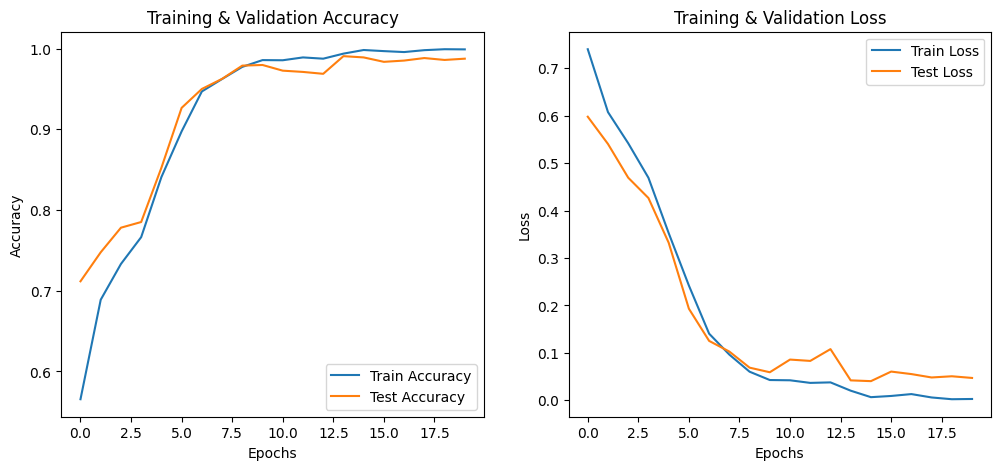

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define CNN model for feature extraction
def create_cnn(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    feature_layer = layers.Dense(64, activation='relu', name='feature_layer')(x)
    outputs = layers.Dense(10, activation='softmax')(feature_layer)  # Ensure output layer for training
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Load preprocessed dataset
(X_train, y_train), (X_test, y_test) = (np.load('X_train.npy'), np.load('y_train.npy')), (np.load('X_test.npy'), np.load('y_test.npy'))
input_shape = X_train.shape[1:]

# Initialize and compile CNN
cnn_model = create_cnn(input_shape)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and reducing learning rate
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train CNN model
history = cnn_model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Ensure model is built before feature extraction
cnn_model.predict(np.expand_dims(X_train[0], axis=0))  # Dummy forward pass

# Extract features for SVM
feature_extractor = keras.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('feature_layer').output)  # Extract from feature layer
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Reshape extracted features for SVM
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

# Train SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_features, y_train)

# Predictions and evaluation
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


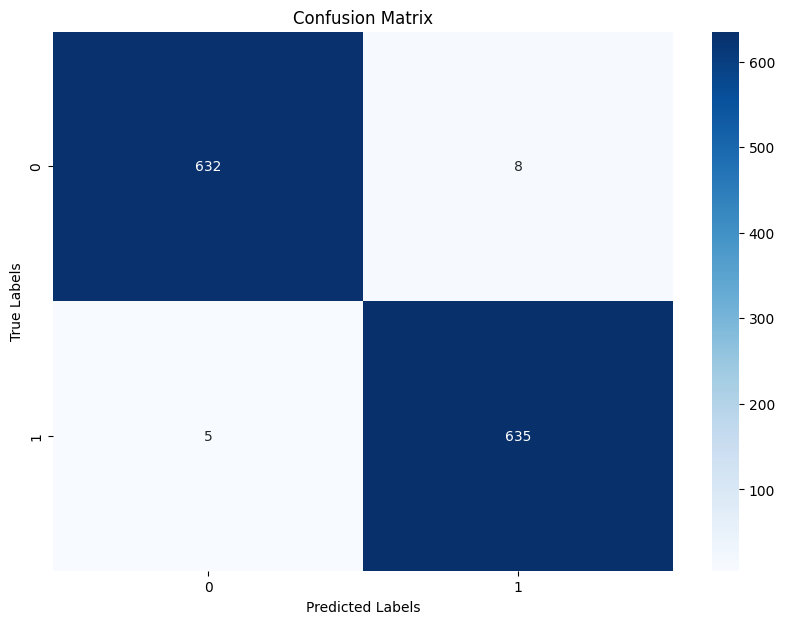

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 99s 589ms/step - accuracy: 0.4747 - loss: 0.9496 - val_accuracy: 0.5000 - val_loss: 0.7315 - learning_rate: 0.0010
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 91s 567ms/step - accuracy: 0.5073 - loss: 0.7228 - val_accuracy: 0.6891 - val_loss: 0.6229 - learning_rate: 0.0010
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 573ms/step - accuracy: 0.6293 - loss: 0.6603 - val_accuracy: 0.6914 - val_loss: 0.6050 - learning_rate: 0.0010
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 581ms/step - accuracy: 0.6608 - loss: 0.6245 - val_accuracy: 0.7180 - val_loss: 0.5898 - learning_rate: 0.0010
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 91s 568ms/step - accuracy: 0.6684 - loss: 0.6214 - val_accuracy: 0.7180 - val_loss: 0.5740 - learning_rate: 0.0010
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 573ms/step - accuracy: 0.6593 - loss: 0.6153 - val_accuracy: 0.6805 - val_loss: 0.6032 - learning_rate: 0.0010
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 91s 567ms/step - accuracy: 0.6

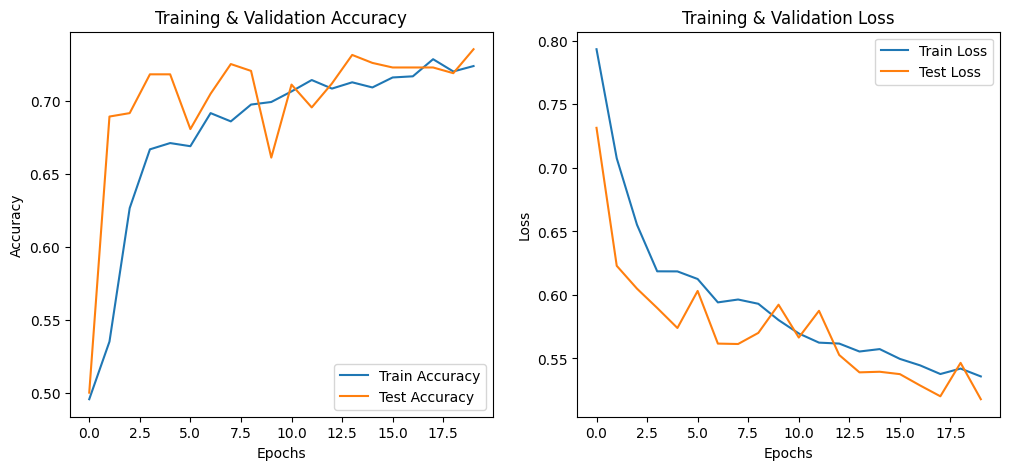

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define CNN model for feature extraction
def create_cnn(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    feature_layer = layers.Dense(64, activation='relu', name='feature_layer')(x)
    outputs = layers.Dense(10, activation='softmax')(feature_layer)  # Ensure output layer for training
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Load preprocessed dataset
(X_train, y_train), (X_test, y_test) = (np.load('X_train.npy'), np.load('y_train.npy')), (np.load('X_test.npy'), np.load('y_test.npy'))
input_shape = X_train.shape[1:]

# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate images by 15 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1, # Shift height by 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.1          # Random zoom
)
datagen.fit(X_train)

# Initialize and compile CNN
cnn_model = create_cnn(input_shape)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and reducing learning rate
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train CNN model with augmented data
history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32), 
    epochs=20, validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr],
    steps_per_epoch=len(X_train) // 32
)

# Ensure model is built before feature extraction
cnn_model.predict(np.expand_dims(X_train[0], axis=0))  # Dummy forward pass

# Extract features for SVM
feature_extractor = keras.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('feature_layer').output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Reshape extracted features for SVM
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

# Train SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_features, y_train)

# Predictions and evaluation
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


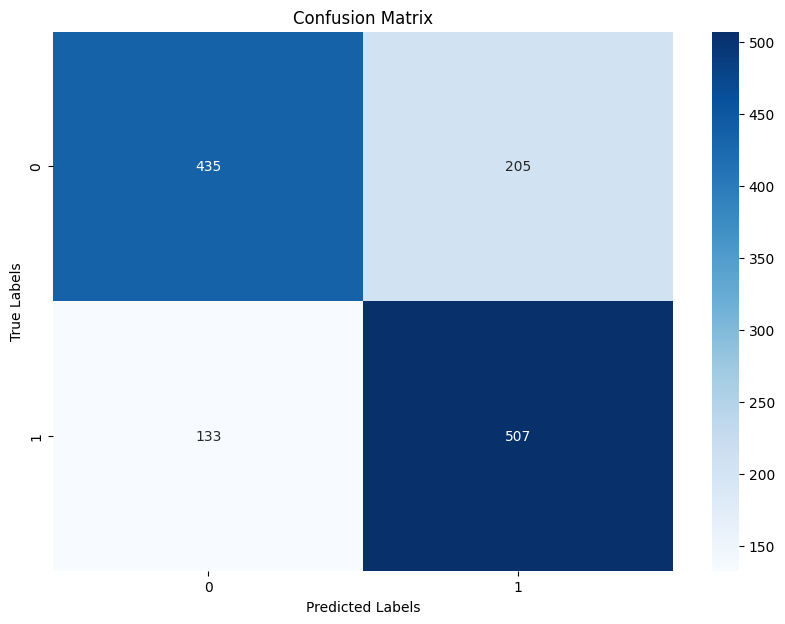

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
